In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Netflix TV Shows and Movies.csv')

In [3]:
df.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


In [5]:
df.describe()

,index,release_year,runtime,imdb_score,imdb_votes
count,5283.000000,5283.000000,5283.000000,5283.000000,5.267000e+03
mean,2641.000000,2015.879992,79.199886,6.533447,2.340719e+04
std,1525.215067,7.346098,38.915974,1.160932,8.713432e+04
min,0.000000,1953.000000,0.000000,1.500000,5.000000e+00
25%,1320.500000,2015.000000,45.000000,5.800000,5.210000e+02
50%,2641.000000,2018.000000,87.000000,6.600000,2.279000e+03
75%,3961.500000,2020.000000,106.000000,7.400000,1.014400e+04
max,5282.000000,2022.000000,235.000000,9.600000,2.268288e+06


In [6]:
df.age_certification.unique()

array(['R', 'PG', 'TV-14', 'G', 'PG-13', nan, 'TV-MA', 'TV-PG', 'TV-Y',
       'TV-G', 'TV-Y7', 'NC-17'], dtype=object)

In [7]:
df['age_certification'] = df['age_certification'].map({
    'G': 0,
    'TV-Y': 1,
    'TV-G': 2,
    'TV-Y7': 3,
    'PG': 4,
    'TV-PG': 5,
    'PG-13': 6,
    'TV-14': 7,
    'R': 8,
    'NC-17': 9,
    'TV-MA': 10
}
)
df['age_certification'] = df['age_certification'].fillna(11)
df['age_certification'] = df['age_certification'].astype(int)
df.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,8,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,4,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,8,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,8,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,7,30,tt0063929,8.8,72895.0


In [8]:
df.type.unique()

array(['MOVIE', 'SHOW'], dtype=object)

In [9]:
df['type'] = df['type'].map({'MOVIE':1,'SHOW':0})

In [10]:
df_2 = df[['release_year','runtime','imdb_score','imdb_votes','age_certification','type']]

In [11]:
df_2.head()

,release_year,runtime,imdb_score,imdb_votes,age_certification,type
0,1976,113,8.3,795222.0,8,1
1,1975,91,8.2,530877.0,4,1
2,1979,94,8.0,392419.0,8,1
3,1973,133,8.1,391942.0,8,1
4,1969,30,8.8,72895.0,7,0


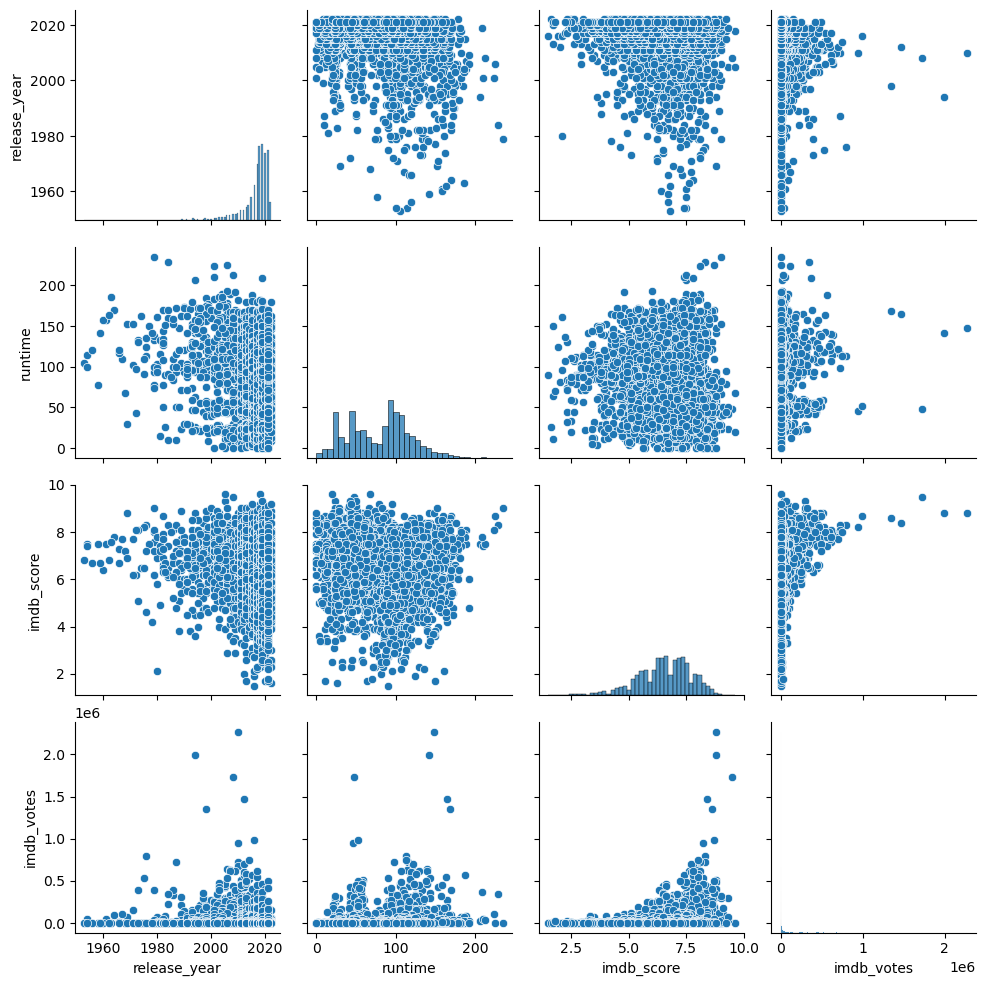

In [12]:
sns.pairplot(df_2[['release_year','runtime','imdb_score','imdb_votes']])

<Axes: >

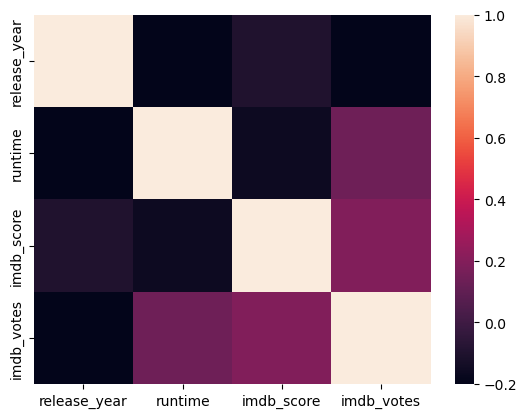

In [13]:
sns.heatmap(df_2[['release_year','runtime','imdb_score','imdb_votes']].corr())

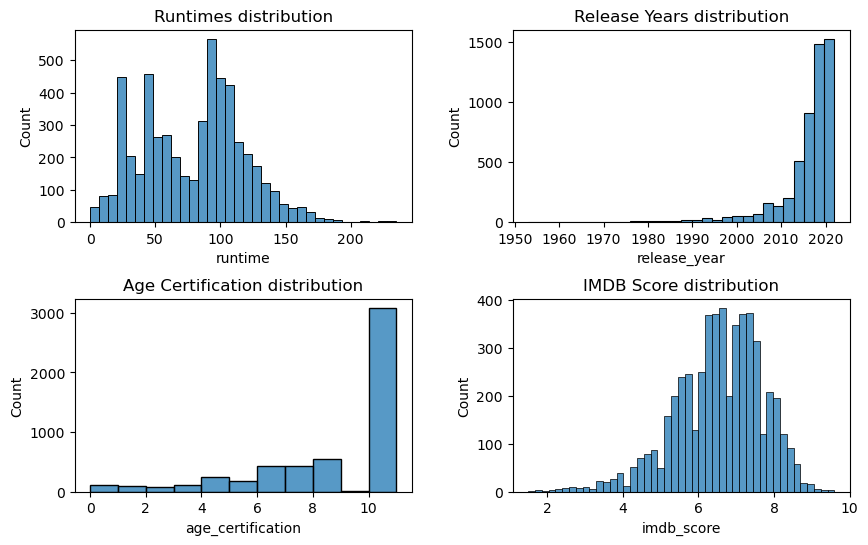

In [14]:
fig, ax = plt.subplots(2,2,figsize=(10,6)) 
sns.histplot(df_2['runtime'],ax=ax[0,0])
ax[0,0].set_title('Runtimes distribution')

sns.histplot(df_2['release_year'],bins=30,ax=ax[0,1])
ax[0,1].set_title('Release Years distribution')

sns.histplot(df_2['age_certification'],bins=11,ax=ax[1,0])
ax[1,0].set_title('Age Certification distribution')

sns.histplot(df_2['imdb_score'],ax=ax[1,1])
ax[1,1].set_title('IMDB Score distribution')

plt.subplots_adjust(wspace=0.3, hspace=0.4)

plt.show()

In [15]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_year       5283 non-null   int64  
 1   runtime            5283 non-null   int64  
 2   imdb_score         5283 non-null   float64
 3   imdb_votes         5267 non-null   float64
 4   age_certification  5283 non-null   int32  
 5   type               5283 non-null   int64  
dtypes: float64(2), int32(1), int64(3)
memory usage: 227.1 KB


In [16]:
df_2.dropna(inplace=True)

C:\Users\mainf\AppData\Local\Temp\ipykernel_34012\600093465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.dropna(inplace=True)


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [31]:
X = np.array(df_2.drop('imdb_score',axis=1).dropna())
y = df_2[['imdb_score']].dropna()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Assuming X_train, X_test, y_train, y_test are defined
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Calculating metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")


MAE: 0.8310496298124298
MSE: 1.1509300483182776
RMSE: 1.072814079101443
R-squared: 0.13097872421169765


In [34]:
print(predictions)

[[6.12981568]
 [6.8962493 ]
 [6.98854053]
 ...
 [6.63307954]
 [6.95132372]
 [6.07411258]]


In [35]:
X_test.size

6585

In [36]:
y_test.size

1317

In [37]:
predictions.size

1317

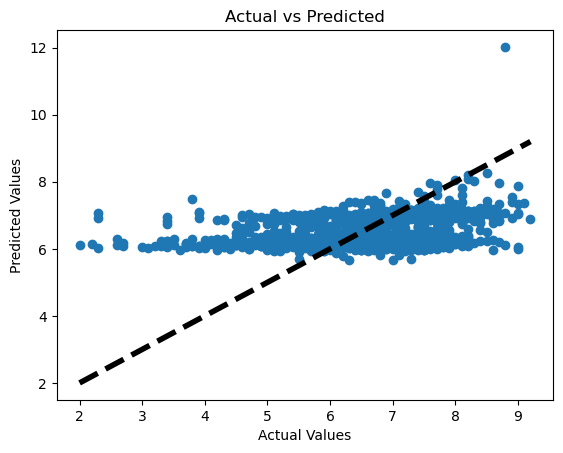

In [39]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

